# Indian startup ecosystem 

Your team is trying to venture into the Indian start-up ecosystem. As the data expert of the team, you are to investigate the ecosystem and propose the best course of action.
Analyze funding received by start-ups in India from 2018 to 2021.
Separate data for each year of funding will be provided.
• In these datasets, you'll find the start-ups' details, the funding amounts received, and the investors' information

# Hypothesis

Null  Hypothesis:Location of the sector has effect on the amount of start up funding

alternative Hypothesis: Locattion of the sector dose not have any effect on the start up funding

# 2.0 loading packages 

In [292]:
# Neccesary liberaries
import pyodbc
from dotenv import dotenv_values
import pandas as pd
import numpy as np
from scipy import stats
import statistics as stat
import warnings
import os
import matplotlib.pyplot as plt
import seaborn as sns

 
warnings.filterwarnings('ignore')

2.1 load environment variables and setting the .env files 

In [293]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

connection =pyodbc.connect(connection_string)

# 3. Expected Workflow



&#8226; business understanding

&#8226; load packages

&#8226; load dataset

&#8226; clean datasets

&#8226; test hypothesis

&#8226; answer question

&#8226; insights and conclusion



# 4. Import data

<b>load the 2020&2021 sql dataset<b>

In [294]:
# load the 2020 sql dataset
query_2020= "Select * FROM dbo.LP1_startup_funding2020"
data_2020 = pd.read_sql(query_2020, connection)

#load the 2021 sql datasets
query_2021= "Select * FROM dbo.LP1_startup_funding2021"
data_2021= pd.read_sql(query_2021, connection)

<b> load the 2018 & 2019 csv dataset

In [295]:
#load 2018 csv dataset
data_2018=pd.read_csv('startup_funding2018.csv')

#load data 2019 csv files
data_2019=pd.read_csv('startup_funding2019.csv')

# 5. Cleaning the dataset

<b> Step 1 - add and drop some columns

In [296]:
# Add a Year Column (this will help in concating and merging the data sets)
data_2018['Year']='2018'
data_2019['Year']='2019'
data_2020['Year']='2020'
data_2021['Year']='2021'

In [297]:
# drop the column we will not be using from data 2019,2020 and 2021
data_2019.drop(['Founded', 'Founders', 'Investor'], axis=1, inplace=True)
data_2020.drop(['Founded', 'Founders', 'Investor'], axis=1, inplace=True)
data_2021.drop(['Founded', 'Founders', 'Investor'], axis=1, inplace=True)

In [298]:
data_2020. drop(columns={'column10'}, inplace= True)

In [299]:
data_2020

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount,Stage,Year
0,Aqgromalin,Chennai,AgriTech,Cultivating Ideas for Profit,200000.0,None,2020
1,Krayonnz,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,100000.0,Pre-seed,2020
2,PadCare Labs,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,NaN,Pre-seed,2020
3,NCOME,New Delhi,Escrow,Escrow-as-a-service platform,400000.0,None,2020
4,Gramophone,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,340000.0,None,2020
...,...,...,...,...,...,...,...
1050,Leverage Edu,Delhi,Edtech,AI enabled marketplace that provides career gu...,1500000.0,None,2020
1051,EpiFi,None,Fintech,It offers customers with a single interface fo...,13200000.0,Seed Round,2020
1052,Purplle,Mumbai,Cosmetics,Online makeup and beauty products retailer,8000000.0,None,2020
1053,Shuttl,Delhi,Transport,App based bus aggregator serice,8043000.0,Series C,2020


<b> Step 2 - renaming common columns into common names  

In [300]:
#renaming the 2018 dataset columns
data_2018=data_2018.rename(columns={'Company Name': 'Company_Brand', 'Round/Series': 'Stage',
                                    'Industry': 'Sector', 'Amount': 'Amount', 'About Company': 'BIO', 'Location':'HeadQuarter'})

# renaming the 2019 dataset columns
data_2019 = data_2019.rename(columns={'Company/Brand': 'Company_Brand', 'Sector': 'Sector', 'Stage': 'Stage', 'Amount($)': 'Amount',
                                      'What it does': 'BIO', 'HeadQuarter':'HeadQuarter'})

# Renaming the 2020 dataset

data_2020 = data_2020.rename(columns={'Company_Brand': 'Company_Brand', 'Sector': 'Sector', 'Amount': 'Amount',
                                       'What_it_does': 'BIO', 'Location':'HeadQuarter'})

#renaming  the  2021 dataset 
data_2021 = data_2021.rename(columns={'Company_Brand': 'Company_Brand', 'Sector': 'Sector', 'Amount': 'Amount', 
                                      'What_it_does': 'BIO', 'HeadQuarter':'HeadQuarter'})

<b> Step 3 - Harmonising the Stage column entries in 2018,2019,2020 &2021 data

In [301]:
data_2018['Stage'].value_counts()

Stage
Seed                                                                                                       280
Series A                                                                                                    73
Angel                                                                                                       37
Venture - Series Unknown                                                                                    37
Series B                                                                                                    20
Series C                                                                                                    16
Debt Financing                                                                                              13
Private Equity                                                                                              10
Corporate Round                                                                                           

In [302]:
#  # replacing the data 2018 unique satage value to a common value
data_2018.replace(to_replace=['Seed round', 'Seed funding', 'Early seed', 'Seed fund', 'Seed Investment', 'Seed Round', 'Seed+'], value='Seed', inplace=True)
data_2018.replace(to_replace=['Angel Round'], value='Angel', inplace=True)
data_2018.replace(to_replace=['Venture - Series Unknown'], value='Undisclosed', inplace=True)
data_2018.replace(to_replace=['Debt Financing', 'Post-IPO Debt'], value='Debt', inplace=True)
data_2018.replace(to_replace=['Private Equity', 'Post-IPO Equity'], value='Equity', inplace=True)
data_2018.replace(to_replace=['Corporate Round', 'Grant', 'Secondary Market', 'Non-equity Assistance', 'Funding Round'], value='Other', inplace=True)
data_2018.replace(to_replace=['Pre-Series B', 'Pre-series B'], value='Pre-Seed', inplace=True)

In [303]:
#remove non-standard entries (https)

data_2018= data_2018[data_2018['Stage'].str.startswith('https')==False]


In [304]:
data_2019['Stage'].value_counts()

Stage
Series A         10
Pre series A      8
Series B          8
Series D          4
Series C          3
Fresh funding     1
Series G          1
Post series A     1
Seed funding      1
Seed fund         1
Series E          1
Series F          1
Series B+         1
Seed round        1
Pre-series A      1
Name: count, dtype: int64

In [305]:
# replacing the data 2019 unique satage value to a common value

data_2019.replace(to_replace=['Seed funding', 'Seed fund', 'Seed round'], value='Seed', inplace=True)
data_2019.replace(to_replace=['Pre series A', 'Pre-series A'], value='Pre-Seed', inplace=True)
data_2019.replace(to_replace=['Series B+'], value='Series B', inplace=True)
data_2019.replace(to_replace=['Post series A', 'Fresh funding'], value='Other', inplace=True)

In [306]:
data_2020['Stage'].value_counts()

Stage
Series A                 96
Seed                     80
Seed Round               69
Series B                 57
Pre series A             54
Pre-series A             53
Series C                 50
Series D                 22
Debt                     18
Pre Series A             12
Pre-seed                 11
Seed round                9
Series E                  6
Bridge                    6
Series F                  4
Pre-series B              4
Angel Round               4
Pre seed round            4
Pre-seed Round            2
Pre series B              2
Pre-Seed                  2
Seed Funding              2
Series B2                 2
Pre-series C              2
Seed funding              2
Pre-Series B              2
Seed Round & Series A     1
Series C, D               1
Mid series                1
Series D1                 1
Seed Investment           1
Pre series C              1
Pre-series                1
Bridge Round              1
Series H                  1
Seed A        

In [307]:
data_2020['Stage'].value_counts()

Stage
Series A                 96
Seed                     80
Seed Round               69
Series B                 57
Pre series A             54
Pre-series A             53
Series C                 50
Series D                 22
Debt                     18
Pre Series A             12
Pre-seed                 11
Seed round                9
Series E                  6
Bridge                    6
Series F                  4
Pre-series B              4
Angel Round               4
Pre seed round            4
Pre-seed Round            2
Pre series B              2
Pre-Seed                  2
Seed Funding              2
Series B2                 2
Pre-series C              2
Seed funding              2
Pre-Series B              2
Seed Round & Series A     1
Series C, D               1
Mid series                1
Series D1                 1
Seed Investment           1
Pre series C              1
Pre-series                1
Bridge Round              1
Series H                  1
Seed A        

In [308]:
# replacing the data 2020 unique satage value to a common value

data_2020.replace(to_replace=['Seed Round', 'Seed round', 'Seed funding', 'Seed A', 'Seed Funding', 'Seed Investment','Pre seed Round', 'Seed funding' 'Seed A' 'Pre-seed', 'Pre seed round', 'Pre-seed Round', 'Pre-Seed'], value='Seed', inplace=True)
data_2020.replace(to_replace=['Series A1', 'Series A-1'], value='Series A', inplace=True)
data_2020.replace(to_replace=['Series B2'], value='Series B', inplace=True)
data_2020.replace(to_replace=['Pre series B', 'Pre-Series B', 'Pre series C', 'Pre-Series B' 'Pre series C','Pre series A1', 'Pre-series', 'Pre series A', 'Pre-series A', 'Pre- series A', 'Pre Series A', 'Pre-series A1', 'Pre-series C', 'Pre-series B'], value='Pre-Series', inplace=True)
data_2020.replace(to_replace=['Series E', 'Series E2', 'Series F'], value='Series E and Beyond', inplace=True)
data_2020.replace(to_replace=['Series C, D', 'Series D', 'Series D1'], value='Series D', inplace=True)
data_2020.replace(to_replace=['Bridge Round', 'Edge', 'Bridge'], value='Bridge', inplace=True)
data_2020.replace(to_replace=['Angel Round'], value='Angel', inplace=True)

In [309]:
data_2021['Stage'].value_counts()

Stage
Seed             246
Pre-series A     157
Series A         126
Series B          49
Pre-seed          47
Series C          45
Debt              27
Series D          21
Series E          18
Pre-series B      10
Series F           6
Pre-series A1      4
Pre-series         2
$300000            2
Series H           2
Series G           2
Bridge             2
$1200000           2
Series A+          1
Series F2          1
Series B3          1
PE                 1
Series F1          1
Seed+              1
Early seed         1
Series D1          1
$6000000           1
$1000000           1
Seies A            1
Series A2          1
Series I           1
Name: count, dtype: int64

In [310]:
# replacing the data 2021 unique satage value to a common value

data_2021.replace(to_replace=['Seed Round', 'Seed round', 'Seed funding', 'Seed A', 'Seed+', 'Seed Funding', 'Seed Investment','Pre seed Round', 'Early seed', 'Seed funding' 'Seed A' 'Pre-seed', 'Pre seed round', 'Pre-seed', 'Pre-seed Round', 'Pre-Seed'], value='Seed', inplace=True)
data_2021.replace(to_replace=['Series A1', 'Seies A', 'Series A2', 'Series A+', 'Series A-1'], value='Series A', inplace=True)
data_2021.replace(to_replace=['Series B2', 'Series B3'], value='Series B', inplace=True)
data_2021.replace(to_replace=['Pre series B', 'Pre-Series B', 'Pre series C', 'Pre-Series B' 'Pre series C','Pre series A1', 'Pre-series', 'Pre series A', 'Pre-series A', 'Pre- series A', 'Pre Series A', 'Pre-series A1', 'Pre-series C', 'Pre-series B'], value='Pre-Series', inplace=True)
data_2021.replace(to_replace=['Series E', 'Series I', 'Series F1', 'Series H', 'Series G', 'Series F2', 'Series E2', 'Series F'], value='Series E and Beyond', inplace=True)
data_2021.replace(to_replace=['Series C, D', 'Series D', 'Series D1'], value='Series D', inplace=True)
data_2021.replace(to_replace=['Bridge Round', 'Edge', 'Bridge'], value='Bridge', inplace=True)
data_2021.replace(to_replace=['Angel Round', '$300000', '$1200000', '$6000000', '$1000000'], value='Angel', inplace=True)

<b> Step 3 - Harmonising the Headquater/location column entries in 2018,2019,2020&2021 data.<b>

Harmonising the 2018 headquater columns

In [311]:
data_2018['HeadQuarter']. value_counts()

HeadQuarter
Bangalore, Karnataka, India         101
Mumbai, Maharashtra, India           94
Bengaluru, Karnataka, India          55
Gurgaon, Haryana, India              52
New Delhi, Delhi, India              51
Pune, Maharashtra, India             20
Chennai, Tamil Nadu, India           19
Hyderabad, Andhra Pradesh, India     18
Delhi, Delhi, India                  16
Noida, Uttar Pradesh, India          15
Haryana, Haryana, India              11
Jaipur, Rajasthan, India              9
Ahmedabad, Gujarat, India             6
Kolkata, West Bengal, India           6
Bangalore City, Karnataka, India      5
Indore, Madhya Pradesh, India         4
India, Asia                           4
Kormangala, Karnataka, India          3
Ghaziabad, Uttar Pradesh, India       2
Kochi, Kerala, India                  2
Bhopal, Madhya Pradesh, India         2
Thane, Maharashtra, India             2
Jodhpur, Rajasthan, India             1
Powai, Assam, India                   1
Andheri, Maharashtra, India 

In [312]:
# data cleaning of headquarter in 2018

data_2018.replace(to_replace=['Bangalore City','Bangalore'], value='Bangalore', inplace=True)
data_2018.replace(to_replace=['Delhi','New Delhi'], value='Delhi', inplace=True)
data_2018.replace(to_replace=['Cochin'], value='Kochi', inplace=True)
data_2018.replace(to_replace=['Kormangala'], value='Koramangala', inplace=True)
data_2018.replace(to_replace=['Powai','Worli'], value='Mumbai', inplace=True)
data_2018.replace(to_replace=['Uttar Pradesh', 'Andhra Pradesh'], value='Andhra Pradesh', inplace=True)
data_2018.replace(to_replace=['Trivandrum', 'India'], value='Trivandrum', inplace=True)

<b>Harmonize the 2019 data headquater column

In [313]:
data_2019['HeadQuarter'].value_counts()

HeadQuarter
Bangalore        21
Mumbai           12
Delhi            10
Noida             5
Gurugram          5
Chennai           4
Pune              2
Jaipur            2
Telangana         1
Ahmedabad         1
Haryana           1
Chandigarh        1
New Delhi         1
Surat             1
Uttar pradesh     1
Hyderabad         1
Rajasthan         1
Name: count, dtype: int64

In [314]:
#2019 headquater data cleaning
data_2019.replace(to_replace=['Delhi' , 'New Delhi'], value='Delhi', inplace=True)

<b>Harmonizing the 2020 data headquater column

In [315]:
data_2020['HeadQuarter']. value_counts

<bound method IndexOpsMixin.value_counts of 0         Chennai
1       Bangalore
2            Pune
3       New Delhi
4          Indore
          ...    
1050        Delhi
1051         None
1052       Mumbai
1053        Delhi
1054      Chennai
Name: HeadQuarter, Length: 1055, dtype: object>

In [316]:
#  cleaning of HeadQuater 2020
data_2020.replace(to_replace=['Bangalore City','Bangalore'], value='Bangalore', inplace=True)
data_2020.replace(to_replace=['Delhi','New Delhi'], value='Delhi', inplace=True)
data_2020.replace(to_replace=['Ahmadabad'], value='Ahmedabad', inplace=True)
data_2020.replace(to_replace=['Kochi'], value='Cochin', inplace=True)
data_2020.replace(to_replace=['Kormangala'], value='Koramangala', inplace=True)
data_2020.replace(to_replace=['Rajastan'], value='Rajasthan', inplace=True)
data_2020.replace(to_replace=['Powai','Worli'], value='Mumbai', inplace=True)
data_2020.replace(to_replace=['Small Towns', 'Andhra Pradesh','Uttar Pradesh'], value='Andhra Pradesh', inplace=True)
data_2020.replace(to_replace=['Hyderebad'], value='Hyderabad', inplace=True)
data_2020.replace(to_replace=['Gurugram\t#REF!'], value='Gurugram', inplace=True)
data_2020.replace(to_replace=['Orissia'], value='Orissa', inplace=True)
data_2020.replace(to_replace=['Samstipur','Samastipur, Bihar','Samsitpur'], value='Samastipur', inplace=True)
data_2020.replace(to_replace=['The Nilgiris'], value='Nilgiris', inplace=True)
data_2020.replace(to_replace=['Dhindsara', 'Haryana','Dhingsara, Haryana'], value='Dhingsara', inplace=True)
data_2020.replace(to_replace=['Tirunelveli', 'Tamilnadu'], value='Tirunelveli', inplace=True)
data_2020.replace(to_replace=['Mylapore'], value='Chennai', inplace=True)
data_2020.replace(to_replace=['Rajastan'], value='Rajasthan', inplace=True)
data_2020.replace(to_replace=['Trivandrum', 'Kerala, India'], value='Trivandrum', inplace=True)

#  Renaming some of the headquarters the are not in India to outside india in data 2020
data_2020.replace(to_replace=['Frisco', 'France','Newcastle Upon Tyne, Newcastle upon Tyne, United Kingdom','Frisco Texas, United States',
                              'Irvine, California, United States','San Francisco Bay Area, West Coast, Western US','Texas, United States',
                              'California','New York, United States','San Francisco, California, United States','San Francisco, United States',
                              'San Ramon, California','Paris, Ile-de-France, France','Plano, Texas, United States','Sydney',
                              'San Francisco Bay Area, Silicon Valley, West Coast','Bangaldesh','London, England, United Kingdom',
                              'Sydney, New South Wales, Australia','Milano, Lombardia, Italy','Palmwoods, Queensland, Australia', 
                              'France''Irvine, California, United States','Newcastle Upon Tyne, Newcastle upon Tyne United Kingdom',
                              'Shanghai, China','Jiaxing, Zhejiang, China','San Franciscao','San Francisco','New York'], 
                              value = 'Outside India', inplace=True)

# filling of missing headquarters in 2020
data_2020['HeadQuarter'].fillna('Undisclosed', inplace=True)

<b>Harmonizing the 2021 headquater data colummn

In [317]:
data_2021['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', None,
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Pune', 'Thane', 'Computer Games',
       'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara',
       'Food & Beverages', 'Pharmaceuticals\t#REF!', 'Gurugram\t#REF!',
       'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore', 'Powai',
       'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna', 'Samsitpur',
       'Lucknow', 'Telangana', 'Silvassa', 'Thiruvananthapuram',
       'Faridabad', 'Roorkee', 'Ambernath', 'Panchkula', 'Surat',
       'Coimbatore', 'Andheri', 'Mangalore', 'Telugana', 'Bhubaneswar',
       'Kottayam', 'Beijing', 'Panaji', 'Satara', 'Orissia', 'Jodhpur',
       'New York', 'Santra', 'Mountain View, CA', 'Trivandrum',
       'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati',
       'Online Media\t#REF!', 'Kochi', 'London',
       'Information Technol

In [318]:
#2021 headquater data cleaning
data_2021.replace(to_replace=['London', 'New York', ' Mountain View', 'CA ', 'Beijing', '' ], value='Outside_India', inplace=True)
data_2021.replace(to_replace=['Online Media\t#REF!', 'Pharmaceuticals\t#REF!', 'Food & Beverages', 
                             'Computer Games', 'Small Towns', ' None', 'None', 'Information Technology & Services'], value='Undisclosed', inplace=True)
data_2021.replace(to_replace=['Gurugram\t#REF!' ], value='Gurugrama', inplace=True)

# Step 4 - Currency Conversion for 2018,2019,2020 & 2021 dataset

In [319]:
data_2019['Amount'] = data_2019['Amount'].astype(str).str.replace('$', '').str.replace(',', '')

In [320]:
data_2019

,Company_Brand,HeadQuarter,Sector,BIO,Amount,Stage,Year
0,Bombay Shaving,NaN,Ecommerce,Provides a range of male grooming products,6300000,NaN,2019
1,Ruangguru,Mumbai,Edtech,A learning platform that provides topic-based ...,150000000,Series C,2019
2,Eduisfun,Mumbai,Edtech,It aims to make learning fun via games.,28000000,Other,2019
3,HomeLane,Chennai,Interior design,Provides interior designing solutions,30000000,Series D,2019
4,Nu Genes,Telangana,AgriTech,"It is a seed company engaged in production, pr...",6000000,NaN,2019
...,...,...,...,...,...,...,...
84,Infra.Market,Mumbai,Infratech,It connects client requirements to their suppl...,20000000,Series A,2019
85,Oyo,Gurugram,Hospitality,Provides rooms for comfortable stay,693000000,NaN,2019
86,GoMechanic,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,5000000,Series B,2019
87,Spinny,Delhi,Automobile,Online car retailer,50000000,NaN,2019


<b> Currency Conversion For 2018 & 2019 csv Files

In [321]:
data_2018

,Company_Brand,Sector,Stage,Amount,HeadQuarter,BIO,Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018
...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif...",2018
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.,2018
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...,2018
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...,2018


In [322]:



 # Create a new column 'currency' based on currency symbols
data_2018['currency']= data_2018['Amount'].apply(lambda x: 'INR' if '₹' else ('USD' if '$'in x else 'USD'))

# # Create columns 'amount_inr' and 'amount_usd'
data_2018['amount_inr'] = data_2018.apply(lambda row: row['Amount'] if row['currency'] == 'INR' else 0, axis=1)
data_2018['amount_usd'] = data_2018.apply(lambda row: row['Amount'] if row['currency'] == 'USD' else 0, axis=1)

# # Remove the currency sysmbols and the commas 

data_2018['amount_inr'] = data_2018['amount_inr'].astype(str).str.replace('₹', '').str.replace(',', '')
data_2018['amount_usd'] = data_2018['amount_usd'].astype(str).str.replace('$', '').str.replace(',', '')

# # Replace 'Undisclosed' values with NaN
data_2018['amount_inr']= data_2018['amount_inr'].replace('Undisclosed',np.nan, regex=True)
data_2018['amount_usd'] = data_2018['amount_usd'].replace('Undisclosed', np.nan, regex=True)


# Convert the object values into numeric values for calculation

data_2018['amount_inr'] = pd.to_numeric(data_2018['amount_inr'], errors='coerce')
data_2018['amount_usd'] = pd.to_numeric(data_2018['amount_usd'], errors='coerce')

#  #Define the exchange rate
exchange_rate_inr_to_usd = 1 / 83.23  # 1 USD = 83.23 INR

# # Convert 'amount to USD
data_2018['amount_inr']= data_2018['amount_inr'].apply(lambda x: x *exchange_rate_inr_to_usd if x is not None else None)

# # Create a new column 'Updated_Amount' by filling missing values in 'amount_inr' with 'amount_usd'
data_2018['Updated Amount']= data_2018['amount_inr'].fillna(data_2018['amount_usd'])





In [323]:
data_2018.drop(columns={ 'Amount','currency', 'amount_inr', 'amount_usd'}, inplace= True)

In [324]:
data_2018.rename(columns={'Updated Amount':'Amount'}, inplace=True )

In [325]:
data_2018

,Company_Brand,Sector,Stage,HeadQuarter,BIO,Year,Amount
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,3.003725e+03
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,4.805959e+05
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,7.809684e+05
3,PayMe India,"Financial Services, FinTech",Angel,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,2.402980e+04
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,0.000000e+00
...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif...",2018,2.703352e+06
522,Happyeasygo Group,"Tourism, Travel",Series A,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.,2018,0.000000e+00
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...,2018,9.011174e+01
524,Droni Tech,Information Technology,Seed,"Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...,2018,4.205214e+05


In [326]:
# Merge the two csv files 
data2018_2019 =pd.concat([data_2018,data_2019], ignore_index= True)


# # Create a new column 'currency' based on currency symbols
# data2018_2019['currency']= data2018_2019['Amount'].apply(lambda x: 'INR' if '₹' else ('USD' if '$'in x else 'USD'))

# # Create columns 'amount_inr' and 'amount_usd'
# data2018_2019['amount_inr'] = data2018_2019.apply(lambda row: row['Amount'] if row['currency'] == 'INR' else 0, axis=1)
# data2018_2019['amount_usd'] = data2018_2019.apply(lambda row: row['Amount'] if row['currency'] == 'USD' else 0, axis=1)

# # Remove the currency sysmbols and the commas 

# data2018_2019['amount_inr'] = data2018_2019['amount_inr'].astype(str).str.replace('₹', '').str.replace(',', '')
# data2018_2019['amount_usd'] = data2018_2019['amount_usd'].astype(str).str.replace('$', '').str.replace(',', '')

# # Replace 'Undisclosed' values with NaN
# data2018_2019['amount_inr']= data2018_2019['amount_inr'].replace('Undisclosed',np.nan, regex=True)
# data2018_2019['amount_usd'] = data2018_2019['amount_usd'].replace('Undisclosed', np.nan, regex=True)


# # Convert the object values into numeric values for calculation

# data2018_2019['amount_inr'] = pd.to_numeric(data2018_2019['amount_inr'], errors='coerce')
# data2018_2019['amount_usd'] = pd.to_numeric(data2018_2019['amount_usd'], errors='coerce')

#  #Define the exchange rate
# exchange_rate_inr_to_usd = 1 / 83.23  # 1 USD = 83.23 INR

# # Convert 'amount to USD
# data2018_2019['amount_inr']= data2018_2019['amount_inr'].apply(lambda x: x *exchange_rate_inr_to_usd if x is not None else None)

# # Create a new column 'Updated_Amount' by filling missing values in 'amount_inr' with 'amount_usd'
# data2018_2019['Updated Amount']= data2018_2019['amount_inr'].fillna(data2018_2019['amount_usd'])



In [327]:
data2018_2019

,Company_Brand,Sector,Stage,HeadQuarter,BIO,Year,Amount
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,3003.724619
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,480595.938964
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,780968.400817
3,PayMe India,"Financial Services, FinTech",Angel,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,24029.796948
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,0.0
...,...,...,...,...,...,...,...
609,Infra.Market,Infratech,Series A,Mumbai,It connects client requirements to their suppl...,2019,20000000
610,Oyo,Hospitality,NaN,Gurugram,Provides rooms for comfortable stay,2019,693000000
611,GoMechanic,Automobile & Technology,Series B,Delhi,Find automobile repair and maintenance service...,2019,5000000
612,Spinny,Automobile,NaN,Delhi,Online car retailer,2019,50000000


<b><i><u>checking and dropping duplicates in data data 2018_2019

In [328]:
data2018_2019.duplicated().value_counts()

False    613
True       1
Name: count, dtype: int64

In [329]:
data2018_2019.drop_duplicates(data2018_2019, keep='first',inplace=True)

In [330]:
data2018_2019.duplicated().value_counts()

False    613
Name: count, dtype: int64

<b> currency conversion for 2020 & 2021 sql datafiles

In [331]:
# concat the  2020 &2021 datafiles
data2020_2021 = pd.concat([data_2020,data_2021], ignore_index= True)

#create two columns 'amount usd' and 'amount inr'
data2020_2021['amount_usd']= data2020_2021['Amount'].apply(lambda x: x if '$' in str(x) else None)
data2020_2021['amount_inr'] = data2020_2021['Amount'].apply(lambda x: x if '$' not in str(x)else None)

# remove the currency signs 
data2020_2021['amount_usd']= data2020_2021['amount_usd'].str.replace('$', '')

#replace 'undisclosed' with 'nan'
data2020_2021['amount_usd']= data2020_2021['amount_usd'].replace(['Undisclosed',np.nan], regex= True )

# Convert the object values into numeric values for calculation
data2020_2021['amount_usd']= pd.to_numeric(data2020_2021['amount_usd'], errors='coerce')
data2020_2021['amount_inr']=pd.to_numeric(data2020_2021['amount_inr'],errors='coerce')

#merge the usd and inr columns
data2020_2021['Updated_Amount']= data2020_2021['amount_inr'].fillna(data2020_2021['amount_usd'])

#drop columns including; 'amount', 'amount_usd', 'amount_inr'
data2020_2021.drop(['Amount', 'amount_usd', 'amount_inr'], axis=1, inplace= True)

data2020_2021.rename(columns={'Updated_Amount':'Amount'}, inplace=True)


In [332]:
data2020_2021.head(2)

,Company_Brand,HeadQuarter,Sector,BIO,Stage,Year,Amount
0,Aqgromalin,Chennai,AgriTech,Cultivating Ideas for Profit,None,2020,200000.0
1,Krayonnz,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,Pre-seed,2020,100000.0


<b><i>checking and dropping the duplicates iin 2020_2021 datasets

In [333]:
data2020_2021.duplicated().value_counts()

False    2233
True       31
Name: count, dtype: int64

In [334]:
data2020_2021

,Company_Brand,HeadQuarter,Sector,BIO,Stage,Year,Amount
0,Aqgromalin,Chennai,AgriTech,Cultivating Ideas for Profit,None,2020,200000.0
1,Krayonnz,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,Pre-seed,2020,100000.0
2,PadCare Labs,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Pre-seed,2020,NaN
3,NCOME,Delhi,Escrow,Escrow-as-a-service platform,None,2020,400000.0
4,Gramophone,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,None,2020,340000.0
...,...,...,...,...,...,...,...
2259,Gigforce,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,Pre-Series,2021,3000000.0
2260,Vahdam,New Delhi,Undisclosed,VAHDAM is among the world’s first vertically i...,Series D,2021,20000000.0
2261,Leap Finance,Bangalore,Financial Services,International education loans for high potenti...,Series C,2021,55000000.0
2262,CollegeDekho,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Series B,2021,26000000.0


In [335]:
data2020_2021.drop_duplicates(keep= 'first', inplace= True)

In [336]:
data2018_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 613 entries, 0 to 613
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company_Brand  613 non-null    object
 1   Sector         608 non-null    object
 2   Stage          567 non-null    object
 3   HeadQuarter    594 non-null    object
 4   BIO            613 non-null    object
 5   Year           613 non-null    object
 6   Amount         613 non-null    object
dtypes: object(7)
memory usage: 38.3+ KB


In [337]:
data2020_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2233 entries, 0 to 2263
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2233 non-null   object 
 1   HeadQuarter    2232 non-null   object 
 2   Sector         2220 non-null   object 
 3   BIO            2233 non-null   object 
 4   Stage          1354 non-null   object 
 5   Year           2233 non-null   object 
 6   Amount         1573 non-null   float64
dtypes: float64(1), object(6)
memory usage: 139.6+ KB


<b><i> merging all the files

In [338]:
indian_startup_df= pd.concat([data2018_2019, data2020_2021], ignore_index= True )

In [339]:
indian_startup_df

,Company_Brand,Sector,Stage,HeadQuarter,BIO,Year,Amount
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,3003.724619
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,480595.938964
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,780968.400817
3,PayMe India,"Financial Services, FinTech",Angel,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,24029.796948
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,0.0
...,...,...,...,...,...,...,...
2841,Gigforce,Staffing & Recruiting,Pre-Series,Gurugram,A gig/on-demand staffing company.,2021,3000000.0
2842,Vahdam,Undisclosed,Series D,New Delhi,VAHDAM is among the world’s first vertically i...,2021,20000000.0
2843,Leap Finance,Financial Services,Series C,Bangalore,International education loans for high potenti...,2021,55000000.0
2844,CollegeDekho,EdTech,Series B,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2021,26000000.0


In [340]:
indian_startup_df.duplicated().value_counts()

False    2846
Name: count, dtype: int64

In [341]:
indian_startup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2846 entries, 0 to 2845
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company_Brand  2846 non-null   object
 1   Sector         2828 non-null   object
 2   Stage          1921 non-null   object
 3   HeadQuarter    2826 non-null   object
 4   BIO            2846 non-null   object
 5   Year           2846 non-null   object
 6   Amount         2186 non-null   object
dtypes: object(7)
memory usage: 155.8+ KB


In [342]:
indian_startup_df['Amount'] = pd.to_numeric(indian_startup_df['Amount'], errors='coerce')

In [343]:
indian_startup_df['Amount'].fillna(0, inplace= True)

# Step 5 - Harmonizing the indian startup df sector

In [344]:
# Filling the missing value in stage column 
indian_startup_df['Sector'].fillna('Unknown', inplace=True)

In [363]:
# merging some of the sector data together base on the services they lender 
indian_startup_df.loc[indian_startup_df['Sector'].str.contains('Finance'),'Sector']= 'Financial Institution'
indian_startup_df.loc[indian_startup_df['Sector'].str.contains('Education'),'Sector']= 'Education'
indian_startup_df.loc[indian_startup_df['Sector'].str.contains('Health'), 'Sector'] = 'Health Care'
indian_startup_df.loc[indian_startup_df['Sector'].str.contains('Marketing'), 'Sector'] = 'Marketing Services'
indian_startup_df.loc[indian_startup_df['Sector'].str.contains('Commerce'), 'Sector']= 'E-Commerce'
indian_startup_df.loc[indian_startup_df['Sector'].str.contains('Artificial'),'Sector']= 'Artificial intelligence'
indian_startup_df.loc[indian_startup_df['Sector'].str.contains('AI'),'Sector']= 'Artificial intelligence'
indian_startup_df.loc[indian_startup_df['Sector'].str.contains('Farming'),'Sector']= 'Agriculture'
indian_startup_df.loc[indian_startup_df['Sector'].str.contains('Agriculture'),'Sector']= 'Agriculture'
indian_startup_df.loc[indian_startup_df['Sector'].str.contains('Internet'),'Sector']= 'Internet Services'
indian_startup_df.loc[indian_startup_df['Sector'].str.contains('Computer'),'Sector']= 'Technology'
indian_startup_df.loc[indian_startup_df['Sector'].str.contains('Financial'),'Sector']= 'Financial Services'
indian_startup_df.loc[indian_startup_df['Sector'].str.contains('Tech'),'Sector']= 'Technology'
indian_startup_df.loc[indian_startup_df['Sector'].str.contains('Transportation'),'Sector']= 'Transport Services'
indian_startup_df.loc[indian_startup_df['Sector'].str.contains('Software'),'Sector']= 'Technology'
indian_startup_df.loc[indian_startup_df['Sector'].str.contains('Home'),'Sector']= 'Home'
indian_startup_df.loc[indian_startup_df['Sector'].str.contains('SaaS'),'Sector']= 'Internet Services'
indian_startup_df.loc[indian_startup_df['Sector'].str.contains('PaaS'),'Sector']= 'Internest Services'


# ANALYSIS- ANSWERING THE QUESTIONS

In [347]:
indian_startup_df.describe()

,Amount
count,2.846000e+03
mean,4.141865e+07
std,1.314877e+09
min,0.000000e+00
25%,0.000000e+00
50%,6.498000e+05
75%,5.400000e+06
max,7.000000e+10


<b>
QUESTION 1<b>
 : which Headquarter has the most populated start up location

In [361]:
most_populated_location = indian_startup_df. groupby('HeadQuarter')['Sector'].count(). reset_index()
most_populated_location = most_populated_location.sort_values(by='Sector', ascending = False)
most_populated_location.head(5)


,HeadQuarter,Sector
11,Bangalore,756
90,Mumbai,372
52,Gurugram,238
94,New Delhi,139
35,Delhi,109


<function matplotlib.pyplot.show(close=None, block=None)>

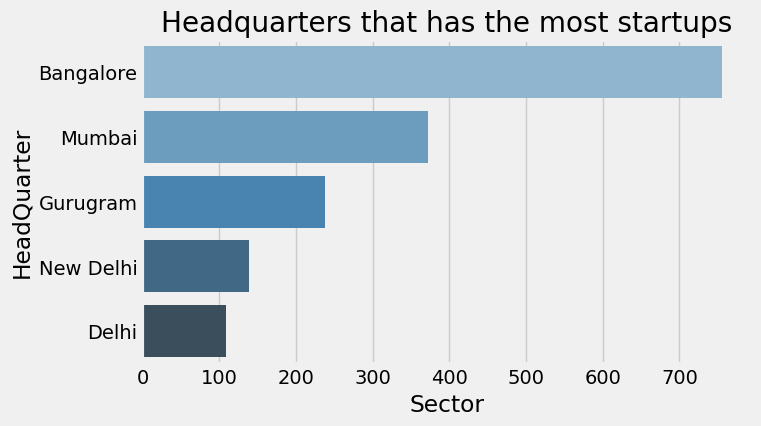

In [362]:
plt.figure(figsize=(7,4))
plt.title('Headquarters that has the most startups')
plt.style.use('fivethirtyeight')
sns.barplot(y='HeadQuarter', x='Sector', palette="Blues_d", data=most_populated_location.iloc[:5])
plt.show

# QUESTION 2

<b> top 10 headquarter that has the highest start up funding<b>

In [350]:
headquarter_startup_fund= indian_startup_df.groupby('HeadQuarter')['Amount'].sum().reset_index()
headquarter_startup_fund= headquarter_startup_fund.sort_values(by='Amount',ascending=False)
headquarter_startup_fund.head(10)

,HeadQuarter,Amount
90,Mumbai,7.763487e+10
11,Bangalore,1.700615e+10
52,Gurugram,5.804202e+09
100,Outside India,4.221500e+09
94,New Delhi,1.907675e+09
35,Delhi,1.656784e+09
136,Undisclosed,1.401683e+09
107,Pune,1.301644e+09
96,Noida,8.045670e+08
50,Gurgaon,7.711630e+08


Text(0.5, 0, 'Total Amount')

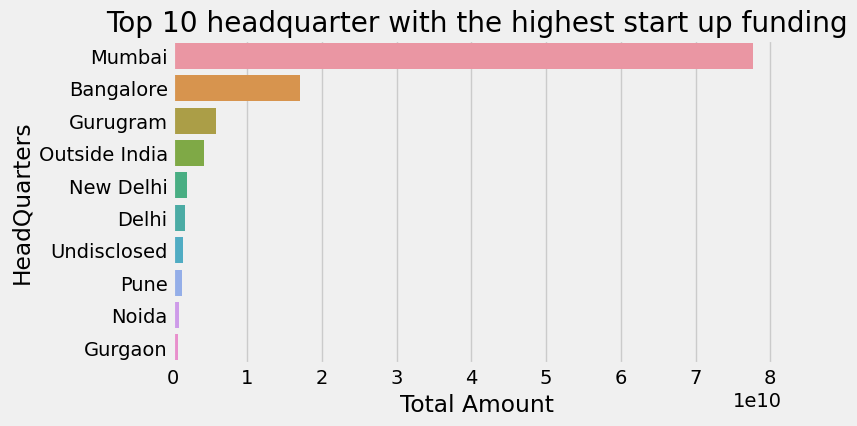

In [351]:
plt.figure(figsize=[7,4])
plt.title('Top 10 headquarter with the highest start up funding')
plt.style.use('fivethirtyeight')
sns.barplot(x='Amount', y='HeadQuarter', palette=None,data= headquarter_startup_fund.iloc[:10])

plt.ylabel('HeadQuarters')
plt.xlabel('Total Amount')



# QUESTION 3

<b>top 10 sector that recieve the highest start up funding<b>

In [367]:
top_10_sector_amount = indian_startup_df.groupby('Sector')['Amount'].sum().reset_index()
top_10_sector_amount = top_10_sector_amount.sort_values(by='Amount', ascending=False)
top_10_sector_amount.head(10)


,Sector,Amount
441,Retail,7.055180e+10
481,Technology,9.372953e+09
243,Financial Services,2.723068e+09
36,Automotive,2.529871e+09
388,Multinational conglomerate company,2.200000e+09
193,E-commerce,1.985832e+09
204,Edtech,1.951625e+09
296,Health Care,1.884475e+09
501,Undisclosed,1.548725e+09
301,Hospitality,1.444090e+09


<function matplotlib.pyplot.show(close=None, block=None)>

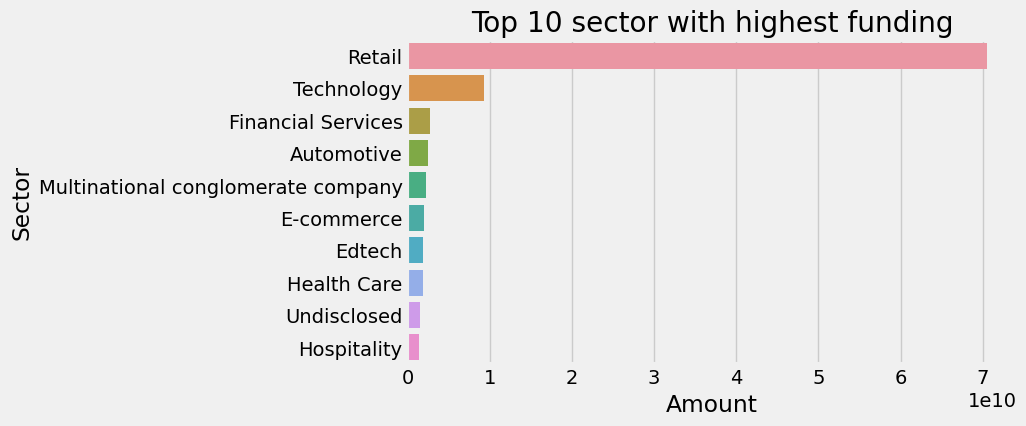

In [364]:
plt.figure(figsize=(7,4))
plt.title('Top 10 sector with highest funding')
plt.style.use('fivethirtyeight')

sns.barplot(y='Sector', x='Amount', palette=None, data=top_10_sector_amount.iloc[:10])

plt.ylabel('Sector')
plt.xlabel('Amount')  

plt.show


# QUESTION 4

<b>Which year recieved has the most start up funding<b>

In [354]:
year_startup_funding=indian_startup_df.groupby('Year')['Amount']. mean().reset_index()
year_startup_funding=year_startup_funding.sort_values(by='Amount', ascending=False)
year_startup_funding

,Year,Amount
2,2020,8.556649e+07
1,2019,3.748801e+07
3,2021,1.999095e+07
0,2018,1.997991e+06


<function matplotlib.pyplot.show(close=None, block=None)>

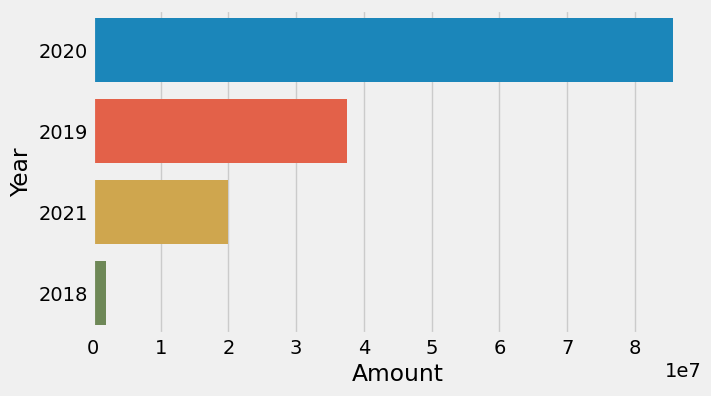

In [355]:
plt.figure(figsize=(7,4))

sns.barplot(y='Year',x='Amount',palette=None, data=year_startup_funding)

plt.show

# QUESTION  5

<b>What is the funding trend in the Indian start-up ecosystem over the past few years<b>

In [356]:
Total_fundings= indian_startup_df.groupby('Year')['Amount'].mean()


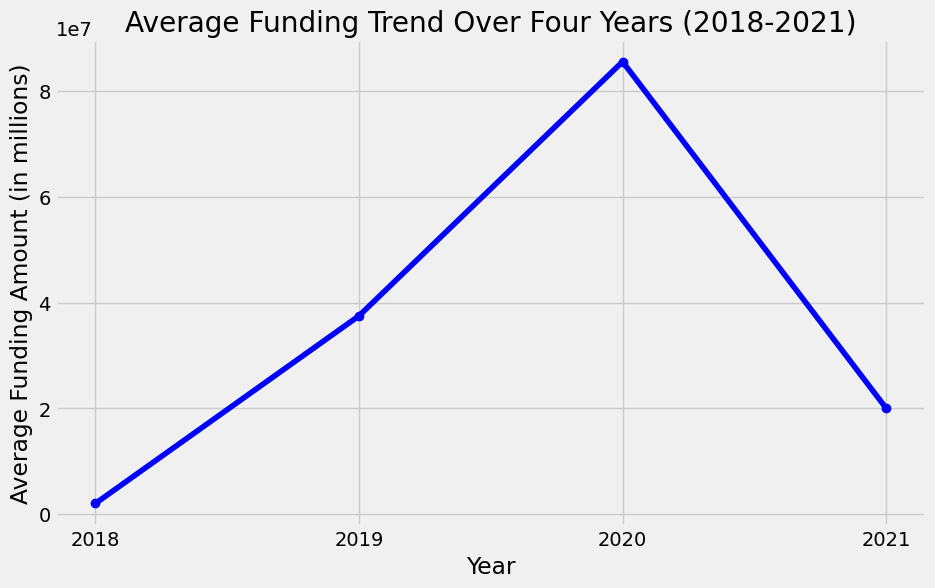

In [357]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(Total_fundings.index, Total_fundings.values, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Average Funding Amount (in millions)')
plt.title('Average Funding Trend Over Four Years (2018-2021)')
plt.grid(True)
plt.show()

In [358]:
import pandas as pd
from io import StringIO

# Assuming india_startup_df is your DataFrame

# Convert the DataFrame to a CSV-formatted string
csv_data = indian_startup_df.to_csv(index=False)

# Read the CSV-formatted string using StringIO
df = pd.read_csv(StringIO(csv_data))

# Specify the file path where you want to save the CSV file
csv_file_path = "output.csv"

# Write the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

print(f"CSV file '{csv_file_path}' has been created.")

CSV file 'output.csv' has been created.


# Recommendation


 From our visualization we recommend to the new investors that location of the start up does not matter that they can invest any where in Indian ecosystem

 # Conclusion


 From the analysis we find out that location has no effect on the amount of start of funding because Bangalore has the highest sector location but Mumbai has the highest start-up funding

In [359]:
df = pd.read_csv('output.csv')

In [360]:
df

,Company_Brand,Sector,Stage,HeadQuarter,BIO,Year,Amount
0,TheCollegeFever,Marketing Services,Seed,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,3.003725e+03
1,Happy Cow Dairy,Agriculture,Seed,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,4.805959e+05
2,MyLoanCare,Financial Services,Series A,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,7.809684e+05
3,PayMe India,Financial Services,Angel,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,2.402980e+04
4,Eunimart,E-Commerce,Seed,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,0.000000e+00
...,...,...,...,...,...,...,...
2841,Gigforce,Staffing & Recruiting,Pre-Series,Gurugram,A gig/on-demand staffing company.,2021,3.000000e+06
2842,Vahdam,Undisclosed,Series D,New Delhi,VAHDAM is among the world’s first vertically i...,2021,2.000000e+07
2843,Leap Finance,Financial Services,Series C,Bangalore,International education loans for high potenti...,2021,5.500000e+07
2844,CollegeDekho,Technology,Series B,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2021,2.600000e+07
